##### Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [3]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [5]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

In [4]:
def isEle_Present(var_list, element):
  isEle_Present = False
  for i in var_list:
    if element == i:
      isEle_Present = True
      break
  return isEle_Present

def plot_imagesubplots(images, labels, class_names, fig_size):
  plt.figure(figsize=fig_size)
  counter = 1
  maxcol = 3
  #print(labels.numpy())
  # print(labels[2].numpy())
  track_labels = list()
  # print(track_labels)
  total_rows = int(len(class_names) / maxcol) + (len(class_names) % maxcol)
  # print('total_rows ', total_rows)
  # print('Columsn ', maxcol)
  for i in range(0, len(labels.numpy())):
    if isEle_Present(track_labels, labels[i].numpy()) == True:
      #print('skipped value', labels[i].numpy())
      continue
    track_labels.append(labels[i].numpy().astype('int'))
    ax = plt.subplot(total_rows, maxcol, counter)
    counter+=1
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i].numpy()])
    plt.axis("off")

In [5]:
def metrics_plot(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(20)

  plt.figure(figsize=(12, 4))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.show()

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [6]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path("/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test")

In [7]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

868
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [8]:
batch_size = 32
img_height = 180
img_width = 180


Use 80% of the images for training, and 20% for validation.

In [9]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    labels="inferred",
    label_mode="int",
    batch_size=batch_size,
    image_size=(img_width, img_height),
    seed=123,
    validation_split=0.2,
    subset="training",
)

Found 3868 files belonging to 9 classes.
Using 3095 files for training.


In [10]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    labels="inferred",
    label_mode="int",
    batch_size=batch_size,
    image_size=(img_height, img_width),
    seed=123,
    validation_split=0.2,
    subset="validation",
)

Found 3868 files belonging to 9 classes.
Using 773 files for validation.


In [11]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

In [12]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
for images, labels in train_ds.take(1):
  print(labels.numpy())
class_names = train_ds.class_names

[4 4 8 6 5 3 4 8 7 6 7 5 5 7 6 8 4 7 5 7 5 4 7 3 8 4 5 5 8 8 6 7]


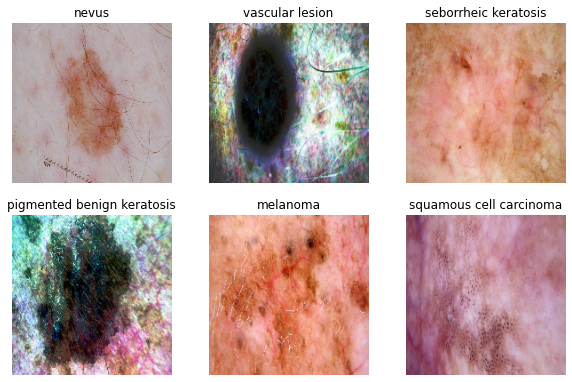

In [13]:
plot_imagesubplots(images=images, labels=labels, class_names=class_names, fig_size=(10, 10))

In [14]:
for images, labels in val_ds.take(1):
  print(labels.numpy())
class_names = val_ds.class_names

[7 6 8 8 8 8 5 6 7 3 7 5 4 7 7 8 6 7 5 7 3 8 7 8 6 3 7 7 6 4 3 6]


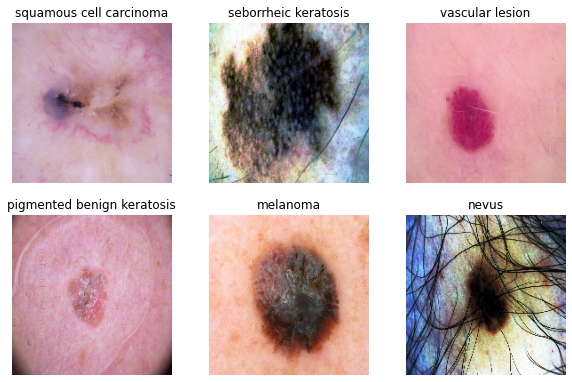

In [15]:
plot_imagesubplots(images=images, labels=labels, class_names=class_names, fig_size=(10, 10))

In [16]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [17]:
### Your code goes here
normalization_layer = tf.keras.layers.Rescaling(1./255)

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [18]:
### Todo, choose an appropirate optimiser and loss function
num_classes = len(class_names)

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [19]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=20
)

Epoch 1/20
97/97 [==============================] - 127s 550ms/step - loss: 1.5090 - accuracy: 0.3758 - val_loss: 1.2534 - val_accuracy: 0.5084
Epoch 2/20
97/97 [==============================] - 6s 63ms/step - loss: 0.9932 - accuracy: 0.6223 - val_loss: 0.9426 - val_accuracy: 0.6197
Epoch 3/20
97/97 [==============================] - 6s 60ms/step - loss: 0.7621 - accuracy: 0.7267 - val_loss: 1.0101 - val_accuracy: 0.6028
Epoch 4/20
97/97 [==============================] - 6s 66ms/step - loss: 0.5792 - accuracy: 0.7919 - val_loss: 0.6873 - val_accuracy: 0.7245
Epoch 5/20
97/97 [==============================] - 6s 63ms/step - loss: 0.4344 - accuracy: 0.8384 - val_loss: 0.6884 - val_accuracy: 0.7400
Epoch 6/20
97/97 [==============================] - 6s 60ms/step - loss: 0.3407 - accuracy: 0.8795 - val_loss: 0.6069 - val_accuracy: 0.7865
Epoch 7/20
97/97 [==============================] - 7s 71ms/step - loss: 0.2544 - accuracy: 0.9153 - val_loss: 0.6019 - val_accuracy: 0.7995
Epoch 8/20

In [20]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 32)        9

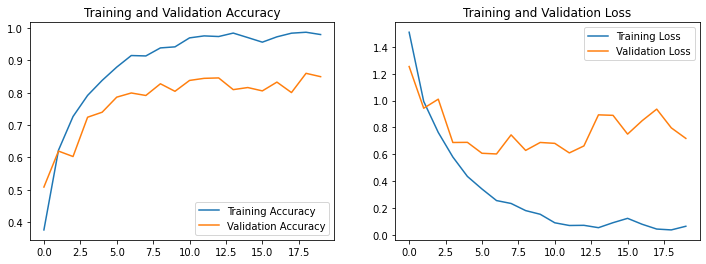

In [21]:
metrics_plot(history)

In [22]:
model1 = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(num_classes)
])

model1.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [23]:
history1 = model1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=20
)

Epoch 1/20
97/97 [==============================] - 13s 129ms/step - loss: 5.6240 - accuracy: 0.3376 - val_loss: 1.1562 - val_accuracy: 0.5071
Epoch 2/20
97/97 [==============================] - 11s 114ms/step - loss: 1.0361 - accuracy: 0.5981 - val_loss: 0.8941 - val_accuracy: 0.6753
Epoch 3/20
97/97 [==============================] - 11s 112ms/step - loss: 0.7510 - accuracy: 0.7183 - val_loss: 0.8054 - val_accuracy: 0.7102
Epoch 4/20
97/97 [==============================] - 11s 114ms/step - loss: 0.5717 - accuracy: 0.7919 - val_loss: 0.7067 - val_accuracy: 0.7387
Epoch 5/20
97/97 [==============================] - 13s 138ms/step - loss: 0.4479 - accuracy: 0.8346 - val_loss: 0.6714 - val_accuracy: 0.7542
Epoch 6/20
97/97 [==============================] - 12s 129ms/step - loss: 0.3783 - accuracy: 0.8679 - val_loss: 0.7276 - val_accuracy: 0.7827
Epoch 7/20
97/97 [==============================] - 12s 127ms/step - loss: 0.3339 - accuracy: 0.8853 - val_loss: 0.6654 - val_accuracy: 0.7529

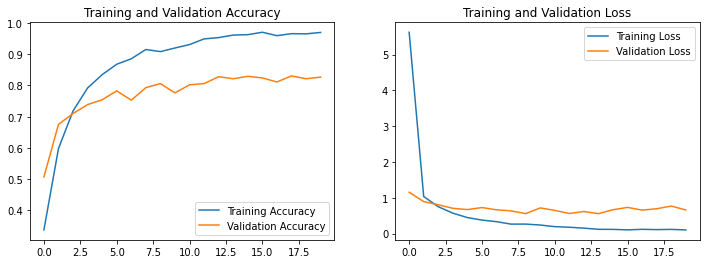

In [24]:
metrics_plot(history1)

In [25]:
model_dp = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(num_classes, activation='softmax')
])

model_dp.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [26]:
history2 = model_dp.fit(
  train_ds,
  validation_data=val_ds,
  epochs=20
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


97/97 [==============================] - 10s 94ms/step - loss: 1.6328 - accuracy: 0.3021 - val_loss: 1.3543 - val_accuracy: 0.4631
Epoch 2/20
97/97 [==============================] - 7s 70ms/step - loss: 1.1352 - accuracy: 0.5590 - val_loss: 1.1253 - val_accuracy: 0.5821
Epoch 3/20
97/97 [==============================] - 6s 65ms/step - loss: 0.9144 - accuracy: 0.6549 - val_loss: 0.9148 - val_accuracy: 0.6429
Epoch 4/20
97/97 [==============================] - 7s 70ms/step - loss: 0.7773 - accuracy: 0.7008 - val_loss: 0.8214 - val_accuracy: 0.6753
Epoch 5/20
97/97 [==============================] - 6s 63ms/step - loss: 0.6493 - accuracy: 0.7606 - val_loss: 0.7621 - val_accuracy: 0.7193
Epoch 6/20
97/97 [==============================] - 7s 74ms/step - loss: 0.5394 - accuracy: 0.8048 - val_loss: 0.6340 - val_accuracy: 0.7490
Epoch 7/20
97/97 [==============================] - 6s 64ms/step - loss: 0.4626 - accuracy: 0.8242 - val_loss: 0.7421 - val_accuracy: 0.7451
Epoch 8/20
97/97 [=====

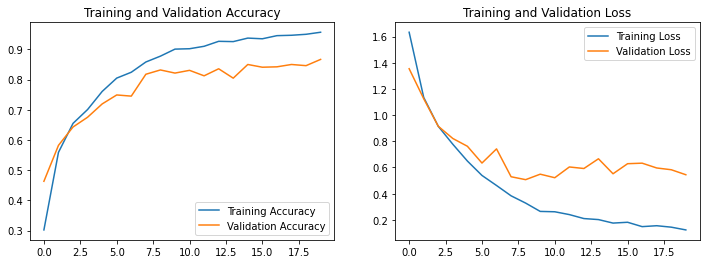

In [27]:
metrics_plot(history2)

In [28]:
model_add_layers = tf.keras.models.Sequential([
tf.keras.layers.Rescaling(1./255),
tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
tf.keras.layers.MaxPooling2D(2, 2),
tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(512, activation='relu'),
#tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(9, activation='softmax')])


In [29]:
model_add_layers.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

history3 = model_add_layers.fit(
  train_ds,
  validation_data=val_ds,
  epochs=20
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


97/97 [==============================] - 10s 93ms/step - loss: 1.5893 - accuracy: 0.3179 - val_loss: 1.4809 - val_accuracy: 0.3790
Epoch 2/20
97/97 [==============================] - 10s 104ms/step - loss: 1.1792 - accuracy: 0.5389 - val_loss: 1.1201 - val_accuracy: 0.5627
Epoch 3/20
97/97 [==============================] - 7s 73ms/step - loss: 0.9785 - accuracy: 0.6107 - val_loss: 0.9534 - val_accuracy: 0.6649
Epoch 4/20
97/97 [==============================] - 7s 74ms/step - loss: 0.7918 - accuracy: 0.6924 - val_loss: 0.7467 - val_accuracy: 0.7245
Epoch 5/20
97/97 [==============================] - 8s 84ms/step - loss: 0.6744 - accuracy: 0.7422 - val_loss: 0.7597 - val_accuracy: 0.6999
Epoch 6/20
97/97 [==============================] - 8s 85ms/step - loss: 0.5717 - accuracy: 0.7735 - val_loss: 0.6939 - val_accuracy: 0.7413
Epoch 7/20
97/97 [==============================] - 6s 67ms/step - loss: 0.5039 - accuracy: 0.8126 - val_loss: 0.5832 - val_accuracy: 0.7930
Epoch 8/20
97/97 [===

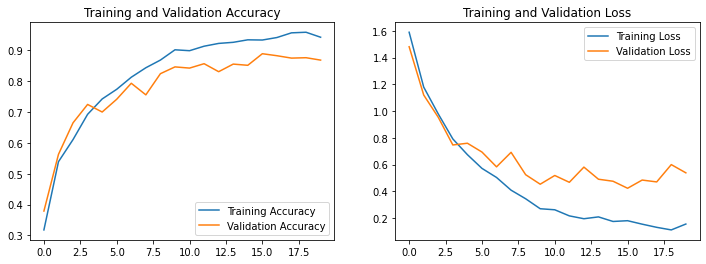

In [30]:
metrics_plot(history3)

In [31]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.layers import GlobalAveragePooling2D
from keras.layers import Activation, Dense
from keras.models import Model
num_classes = 9

def get_model():
    # Get base model 
    # Here we are using ResNet50 as base model
    base_model = ResNet50(weights='imagenet', include_top=False)
    
    # As we are using ResNet model only for feature extraction and not adjusting the weights
    # we freeze the layers in base model
    for layer in base_model.layers:
        layer.trainable = False
        
    # Get base model output 
    base_model_ouput = base_model.output
    
    # Adding our own layer 
    x = GlobalAveragePooling2D()(base_model_ouput)
    # Adding fully connected layer
    x = Dense(512, activation='relu')(x)
    x = Dense(num_classes, activation='softmax', name='fcnew')(x)
    
    model = Model(inputs=base_model.input, outputs=x)
    return model

In [32]:
model_tl = get_model()

94781440/94765736 [==============================] - 2s 0us/step


In [33]:
model_tl.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [34]:
history4 = model_tl.fit(
  train_ds,
  validation_data=val_ds,
  epochs=20
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


97/97 [==============================] - 37s 332ms/step - loss: 1.0617 - accuracy: 0.6294 - val_loss: 0.7731 - val_accuracy: 0.7115
Epoch 2/20
97/97 [==============================] - 29s 298ms/step - loss: 0.4157 - accuracy: 0.8465 - val_loss: 0.4093 - val_accuracy: 0.8538
Epoch 3/20
97/97 [==============================] - 30s 306ms/step - loss: 0.2415 - accuracy: 0.9202 - val_loss: 0.3610 - val_accuracy: 0.8693
Epoch 4/20
97/97 [==============================] - 29s 295ms/step - loss: 0.1699 - accuracy: 0.9457 - val_loss: 0.3165 - val_accuracy: 0.8810
Epoch 5/20
97/97 [==============================] - 30s 307ms/step - loss: 0.1172 - accuracy: 0.9661 - val_loss: 0.3370 - val_accuracy: 0.8849
Epoch 6/20
97/97 [==============================] - 30s 309ms/step - loss: 0.0862 - accuracy: 0.9771 - val_loss: 0.2634 - val_accuracy: 0.9043
Epoch 7/20
97/97 [==============================] - 31s 318ms/step - loss: 0.0628 - accuracy: 0.9855 - val_loss: 0.2939 - val_accuracy: 0.9094
Epoch 8/20

In [35]:
model_tl.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                           

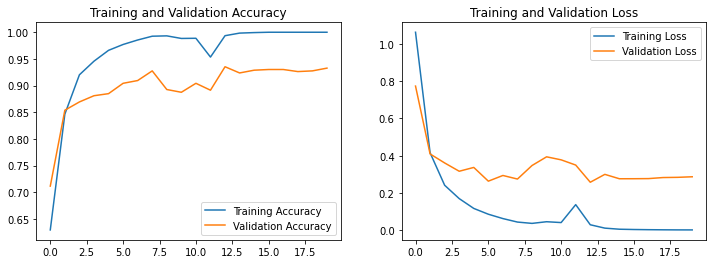

In [36]:
metrics_plot(history4)

In [37]:
max_class_count = 0

for i in class_names:
  class_count = len(list(data_dir_train.glob('{}/*.jpg'.format(i))))
  if max_class_count <= class_count:
    max_class_count = class_count
  print(i,": ",class_count)

actinic keratosis :  0
basal cell carcinoma :  0
dermatofibroma :  0
melanoma :  17
nevus :  18
pigmented benign keratosis :  436
seborrheic keratosis :  77
squamous cell carcinoma :  181
vascular lesion :  139


In [38]:
output_dir = str(data_dir_train) + '/output/'
output_dir

'/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output/'

In [39]:
max_class_count

436

In [40]:
for i in class_names:
  class_count = max_class_count - len(list(data_dir_train.glob('{}/*.jpg'.format(i))))
  print(i,": ",class_count)

actinic keratosis :  436
basal cell carcinoma :  436
dermatofibroma :  436
melanoma :  419
nevus :  418
pigmented benign keratosis :  0
seborrheic keratosis :  359
squamous cell carcinoma :  255
vascular lesion :  297


In [41]:
!pip install Augmentor

In [42]:
import Augmentor

In [43]:
for i in class_names:
  if len(list(data_dir_train.glob('{}/*.jpg'.format(i)))) <= 0:
         continue
  augmnt_pipeline = Augmentor.Pipeline(str(data_dir_train) + '/'+ i)
  augmnt_pipeline.rotate(probability=0.4, max_left_rotation=10, max_right_rotation=10)
  augmnt_pipeline.skew_left_right(probability=0.4, magnitude=0.4)
  augmnt_pipeline.histogram_equalisation(probability=0.5)
  augmnt_pipeline.sample(500)

Initialised with 17 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=2048x1536 at 0x7FA936737690>: 100%|██████████| 500/500 [04:49<00:00,  1.73 Samples/s]


Initialised with 18 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=2048x1536 at 0x7FA9385D08D0>: 100%|██████████| 500/500 [04:20<00:00,  1.92 Samples/s]


Initialised with 436 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FA93681A050>: 100%|██████████| 500/500 [00:25<00:00, 19.69 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FA938CFF150>: 100%|██████████| 500/500 [00:55<00:00,  9.00 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FA9361EA250>: 100%|██████████| 500/500 [00:25<00:00, 19.79 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FA9B1DFD4D0>: 100%|██████████| 500/500 [00:25<00:00, 19.53 Samples/s]


In [44]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

6000


In [45]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0011099.jpg_ebbfdc78-46b8-428a-8549-c731e475ec21.jpg',
 '/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0010982.jpg_7c492ab8-09e5-44e7-a054-5fadf36382c6.jpg',
 '/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0010890.jpg_56dcce3e-7310-4bbc-932a-1b4174c6bbae.jpg',
 '/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0011138.jpg_44815ea1-c594-43a0-9937-76076bf5e3ae.jpg',
 '/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Col

In [46]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',


In [47]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [48]:
import pandas as pd
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
#new_df = original_df.append(df2)
df2

,Path,Label
0,/content/gdrive/MyDrive/CNN_assignment/Skin ca...,seborrheic keratosis
1,/content/gdrive/MyDrive/CNN_assignment/Skin ca...,seborrheic keratosis
2,/content/gdrive/MyDrive/CNN_assignment/Skin ca...,seborrheic keratosis
3,/content/gdrive/MyDrive/CNN_assignment/Skin ca...,seborrheic keratosis
4,/content/gdrive/MyDrive/CNN_assignment/Skin ca...,seborrheic keratosis
...,...,...
5995,/content/gdrive/MyDrive/CNN_assignment/Skin ca...,vascular lesion
5996,/content/gdrive/MyDrive/CNN_assignment/Skin ca...,vascular lesion
5997,/content/gdrive/MyDrive/CNN_assignment/Skin ca...,vascular lesion
5998,/content/gdrive/MyDrive/CNN_assignment/Skin ca...,vascular lesion


In [49]:
df2['Label'].value_counts()

melanoma                      1000
vascular lesion               1000
seborrheic keratosis          1000
nevus                         1000
pigmented benign keratosis    1000
squamous cell carcinoma       1000
Name: Label, dtype: int64

In [50]:
augmented_data_dir = data_dir_train
train_augmnt_ds = tf.keras.preprocessing.image_dataset_from_directory(
    augmented_data_dir,
    labels="inferred",
    label_mode="int",
    batch_size=batch_size,
    image_size=(img_width, img_height),
    seed=123,
    validation_split=0.2,
    subset="training",
)

Found 6868 files belonging to 9 classes.
Using 5495 files for training.


In [51]:
val_augmnt_ds = tf.keras.preprocessing.image_dataset_from_directory(
    augmented_data_dir,
    labels="inferred",
    label_mode="int",
    batch_size=batch_size,
    image_size=(img_height, img_width),
    seed=123,
    validation_split=0.2,
    subset="validation",
)

Found 6868 files belonging to 9 classes.
Using 1373 files for validation.


In [52]:
model_add_layers_aug = tf.keras.models.Sequential([
tf.keras.layers.Rescaling(1./255),
tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
tf.keras.layers.MaxPooling2D(2, 2),
tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(512, activation='relu'),
#tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(9, activation='softmax')])

In [53]:
model_add_layers_aug.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

history_aug = model_add_layers_aug.fit(
  train_augmnt_ds,
  validation_data=val_augmnt_ds,
  epochs=30
)

Epoch 1/30
172/172 [==============================] - 70s 387ms/step - loss: 1.5355 - accuracy: 0.3438 - val_loss: 1.2621 - val_accuracy: 0.4975
Epoch 2/30
172/172 [==============================] - 67s 377ms/step - loss: 1.0603 - accuracy: 0.5740 - val_loss: 0.9153 - val_accuracy: 0.6621
Epoch 3/30
172/172 [==============================] - 68s 379ms/step - loss: 0.7602 - accuracy: 0.7116 - val_loss: 0.6744 - val_accuracy: 0.7371
Epoch 4/30
172/172 [==============================] - 66s 371ms/step - loss: 0.5623 - accuracy: 0.7838 - val_loss: 0.6041 - val_accuracy: 0.7713
Epoch 5/30
172/172 [==============================] - 73s 413ms/step - loss: 0.4325 - accuracy: 0.8391 - val_loss: 0.4203 - val_accuracy: 0.8412
Epoch 6/30
172/172 [==============================] - 71s 398ms/step - loss: 0.3652 - accuracy: 0.8661 - val_loss: 0.5073 - val_accuracy: 0.8172
Epoch 7/30
172/172 [==============================] - 69s 387ms/step - loss: 0.3463 - accuracy: 0.8722 - val_loss: 0.3569 - val_ac

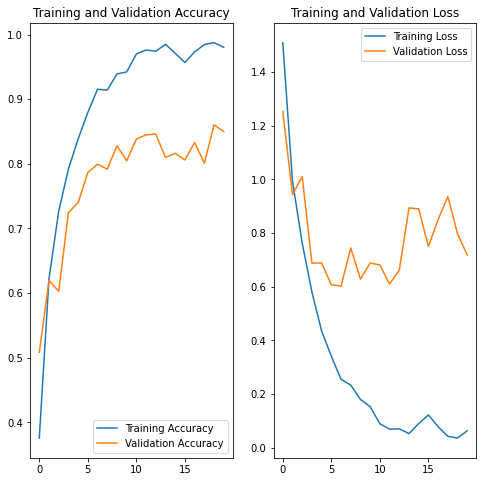

In [57]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = 20
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [58]:
## Model is overfitting 